In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import librosa
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

C:\Users\savas\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [5]:
audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


<AxesSubplot:xlabel='classID', ylabel='count'>

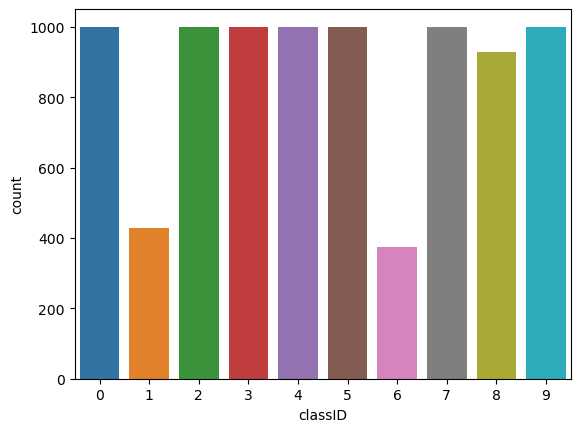

In [6]:
import seaborn as sns
sns.countplot(x=metadata.classID)

In [7]:
audio_file_path='UrbanSound8K/17973-2-0-32.wav'

librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [8]:
print(librosa_audio_data)

[ 0.05806023  0.04728271 -0.02169256 ... -0.00860656  0.03410248
  0.09018897]


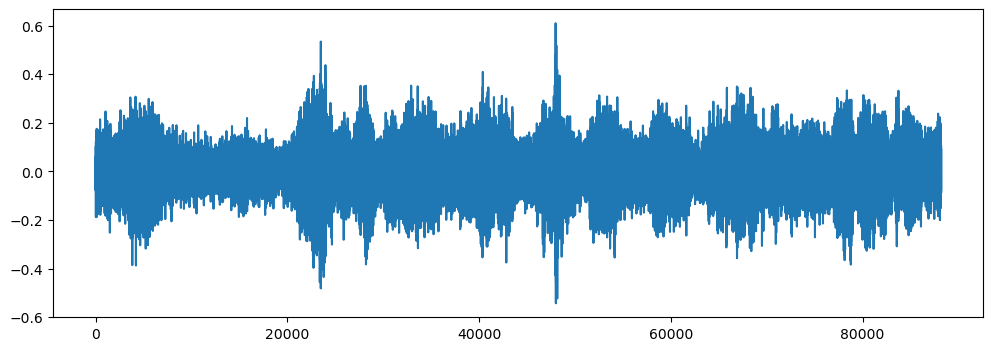

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)
plt.show()

In [10]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=20)   #n_mfcc: number of MFCCs to return 
print(mfccs.shape)

(20, 173)


In [11]:
audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [12]:
def features_extractor(filename):
    audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=20)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [13]:
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [05:47, 10.32it/s]C:\Users\savas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8323it [12:47, 20.33it/s]C:\Users\savas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
8328it [12:47, 26.74it/s]C:\Users\savas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [13:14, 11.00it/s]


In [14]:
extracted_features_df = pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [15]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [16]:
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
y_test.argmax(axis=1)

array([5, 1, 4, ..., 1, 2, 2], dtype=int64)

# Convolutional Neural Networks (CNN)

In [19]:
num_labels = 10

In [20]:
model=Sequential()
# 1. hidden layer
model.add(Dense(125,input_shape=(20,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# 2. hidden layer
model.add(Dense(250))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# 3. hidden layer
model.add(Dense(125))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 125)               2625      
                                                                 
 activation (Activation)     (None, 125)               0         
                                                                 
 dropout (Dropout)           (None, 125)               0         
                                                                 
 dense_1 (Dense)             (None, 250)               31500     
                                                                 
 activation_1 (Activation)   (None, 250)               0         
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 125)               3

In [22]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [23]:
epochscount = 300
num_batch_size = 32

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=epochscount, validation_data=(X_test, y_test), verbose=1)


Epoch 1/300
219/219 [==============================] - 2s 6ms/step - loss: 9.6228 - accuracy: 0.1211 - val_loss: 2.2931 - val_accuracy: 0.1110
Epoch 2/300
219/219 [==============================] - 1s 5ms/step - loss: 2.5011 - accuracy: 0.1183 - val_loss: 2.2805 - val_accuracy: 0.1156
Epoch 3/300
219/219 [==============================] - 1s 5ms/step - loss: 2.3113 - accuracy: 0.1270 - val_loss: 2.2254 - val_accuracy: 0.1305
Epoch 4/300
219/219 [==============================] - 1s 5ms/step - loss: 2.2269 - accuracy: 0.1493 - val_loss: 2.1659 - val_accuracy: 0.1797
Epoch 5/300
219/219 [==============================] - 1s 5ms/step - loss: 2.1761 - accuracy: 0.1764 - val_loss: 2.1166 - val_accuracy: 0.1958
Epoch 6/300
219/219 [==============================] - 1s 5ms/step - loss: 2.1375 - accuracy: 0.1893 - val_loss: 2.0076 - val_accuracy: 0.2444
Epoch 7/300
219/219 [==============================] - 1s 5ms/step - loss: 2.0787 - accuracy: 0.2145 - val_loss: 1.9533 - val_accuracy: 0.2770

Epoch 58/300
219/219 [==============================] - 1s 5ms/step - loss: 1.1418 - accuracy: 0.6132 - val_loss: 0.9450 - val_accuracy: 0.6823
Epoch 59/300
219/219 [==============================] - 1s 5ms/step - loss: 1.1372 - accuracy: 0.6117 - val_loss: 0.9245 - val_accuracy: 0.6995
Epoch 60/300
219/219 [==============================] - 1s 5ms/step - loss: 1.1168 - accuracy: 0.6142 - val_loss: 0.8911 - val_accuracy: 0.7167
Epoch 61/300
219/219 [==============================] - 1s 5ms/step - loss: 1.1491 - accuracy: 0.6166 - val_loss: 0.9131 - val_accuracy: 0.6949
Epoch 62/300
219/219 [==============================] - 1s 5ms/step - loss: 1.1296 - accuracy: 0.6176 - val_loss: 0.9159 - val_accuracy: 0.6966
Epoch 63/300
219/219 [==============================] - 1s 5ms/step - loss: 1.1206 - accuracy: 0.6163 - val_loss: 0.8930 - val_accuracy: 0.7092
Epoch 64/300
219/219 [==============================] - 1s 5ms/step - loss: 1.1044 - accuracy: 0.6269 - val_loss: 0.9055 - val_accuracy:

Epoch 115/300
219/219 [==============================] - 1s 5ms/step - loss: 1.0476 - accuracy: 0.6494 - val_loss: 0.8227 - val_accuracy: 0.7252
Epoch 116/300
219/219 [==============================] - 1s 5ms/step - loss: 1.0093 - accuracy: 0.6587 - val_loss: 0.8047 - val_accuracy: 0.7315
Epoch 117/300
219/219 [==============================] - 1s 4ms/step - loss: 1.0092 - accuracy: 0.6644 - val_loss: 0.7959 - val_accuracy: 0.7470
Epoch 118/300
219/219 [==============================] - 1s 4ms/step - loss: 1.0071 - accuracy: 0.6503 - val_loss: 0.8087 - val_accuracy: 0.7413
Epoch 119/300
219/219 [==============================] - 1s 4ms/step - loss: 1.0044 - accuracy: 0.6591 - val_loss: 0.8221 - val_accuracy: 0.7281
Epoch 120/300
219/219 [==============================] - 1s 4ms/step - loss: 1.0147 - accuracy: 0.6541 - val_loss: 0.7908 - val_accuracy: 0.7590
Epoch 121/300
219/219 [==============================] - 1s 4ms/step - loss: 1.0192 - accuracy: 0.6583 - val_loss: 0.8101 - val_ac

219/219 [==============================] - 2s 7ms/step - loss: 0.9777 - accuracy: 0.6646 - val_loss: 0.7756 - val_accuracy: 0.7459
Epoch 172/300
219/219 [==============================] - 2s 7ms/step - loss: 0.9575 - accuracy: 0.6736 - val_loss: 0.7620 - val_accuracy: 0.7573
Epoch 173/300
219/219 [==============================] - 2s 7ms/step - loss: 0.9857 - accuracy: 0.6667 - val_loss: 0.7634 - val_accuracy: 0.7579
Epoch 174/300
219/219 [==============================] - 2s 8ms/step - loss: 0.9424 - accuracy: 0.6743 - val_loss: 0.7463 - val_accuracy: 0.7613
Epoch 175/300
219/219 [==============================] - 2s 7ms/step - loss: 0.9853 - accuracy: 0.6618 - val_loss: 0.7742 - val_accuracy: 0.7516
Epoch 176/300
219/219 [==============================] - 2s 8ms/step - loss: 0.9726 - accuracy: 0.6699 - val_loss: 0.7574 - val_accuracy: 0.7441
Epoch 177/300
219/219 [==============================] - 2s 8ms/step - loss: 0.9656 - accuracy: 0.6752 - val_loss: 0.7602 - val_accuracy: 0.7573

219/219 [==============================] - 2s 7ms/step - loss: 0.9408 - accuracy: 0.6833 - val_loss: 0.7239 - val_accuracy: 0.7733
Epoch 228/300
219/219 [==============================] - 2s 7ms/step - loss: 0.9477 - accuracy: 0.6783 - val_loss: 0.7309 - val_accuracy: 0.7607
Epoch 229/300
219/219 [==============================] - 2s 7ms/step - loss: 0.9350 - accuracy: 0.6763 - val_loss: 0.7230 - val_accuracy: 0.7733
Epoch 230/300
219/219 [==============================] - 2s 7ms/step - loss: 0.9333 - accuracy: 0.6843 - val_loss: 0.7247 - val_accuracy: 0.7733
Epoch 231/300
219/219 [==============================] - 2s 7ms/step - loss: 0.9189 - accuracy: 0.6870 - val_loss: 0.7468 - val_accuracy: 0.7670
Epoch 232/300
219/219 [==============================] - 2s 7ms/step - loss: 0.9594 - accuracy: 0.6779 - val_loss: 0.7391 - val_accuracy: 0.7647
Epoch 233/300
219/219 [==============================] - 2s 8ms/step - loss: 0.9585 - accuracy: 0.6717 - val_loss: 0.7492 - val_accuracy: 0.7590

219/219 [==============================] - 2s 8ms/step - loss: 0.9052 - accuracy: 0.6859 - val_loss: 0.7084 - val_accuracy: 0.7699
Epoch 284/300
219/219 [==============================] - 2s 8ms/step - loss: 0.9110 - accuracy: 0.6915 - val_loss: 0.6984 - val_accuracy: 0.7722
Epoch 285/300
219/219 [==============================] - 2s 9ms/step - loss: 0.9236 - accuracy: 0.6889 - val_loss: 0.7174 - val_accuracy: 0.7642
Epoch 286/300
219/219 [==============================] - 2s 7ms/step - loss: 0.9034 - accuracy: 0.6899 - val_loss: 0.7066 - val_accuracy: 0.7705
Epoch 287/300
219/219 [==============================] - 2s 9ms/step - loss: 0.9098 - accuracy: 0.6872 - val_loss: 0.7100 - val_accuracy: 0.7693
Epoch 288/300
219/219 [==============================] - 2s 7ms/step - loss: 0.9055 - accuracy: 0.6972 - val_loss: 0.7286 - val_accuracy: 0.7659
Epoch 289/300
219/219 [==============================] - 1s 7ms/step - loss: 0.9222 - accuracy: 0.6876 - val_loss: 0.7277 - val_accuracy: 0.7647

In [85]:

validation_test_set_accuracy = model.evaluate(X_test,y_test,verbose=0)
print(max(validation_test_set_accuracy))
print(min(validation_test_set_accuracy))

0.7733256816864014
0.6931586265563965


In [25]:
cnn_pred=model.predict(X_test)


55/55 [==============================] - 0s 3ms/step


In [26]:
from sklearn.metrics import confusion_matrix
c_mat=confusion_matrix(y_test.argmax(axis=1), cnn_pred.argmax(axis=1))

In [27]:
c_mat

array([[159,   0,  25,   0,   0,   4,   0,   3,   0,   4],
       [  2,  66,   3,   6,   0,   1,   0,   3,   0,  10],
       [ 12,   0, 146,  13,   2,   4,   3,   3,   1,  21],
       [  5,   0,   7, 141,   1,   7,   2,   0,   2,  17],
       [  3,   1,   2,   7, 152,   0,   0,  15,   1,  21],
       [  5,   2,   2,   4,   0, 195,   0,   0,   2,   6],
       [  1,   0,   9,  23,   2,   1,  45,   1,   1,   4],
       [  1,   0,   1,   0,   3,   1,   0, 164,   0,  17],
       [  5,   0,  11,   9,   1,   2,   0,   1, 168,   2],
       [ 10,   3,  32,   6,   5,   5,   0,   6,   1, 115]], dtype=int64)

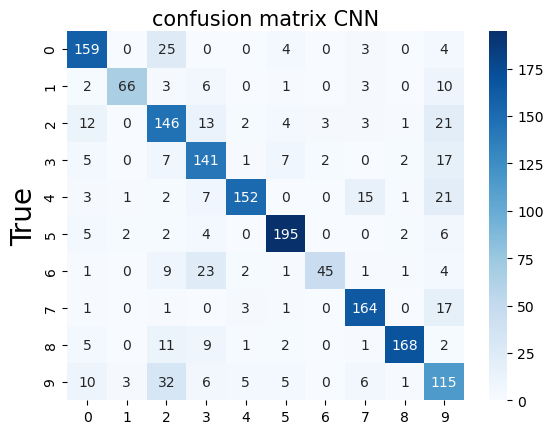

In [28]:
import matplotlib.pyplot as plt  
import seaborn as sns
ax= plt.subplot()
sns.heatmap(c_mat, annot=True, ax = ax,fmt='g',cmap='Blues'); 
ax.set_xlabel('confusion matrix CNN', fontsize=15)
ax.xaxis.set_label_position('top') 

ax.set_ylabel('True', fontsize=20)

plt.show()

# SVM

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score,confusion_matrix
svm_clf = SVC()
svm_clf.fit(X_train,y_train.argmax(axis=1))

svm_pred = svm_clf.predict(X_test)


accuracy_score(y_test.argmax(axis=1),svm_pred)*100

57.75615340583858

In [30]:
c_mat=confusion_matrix(y_test.argmax(axis=1),svm_pred)

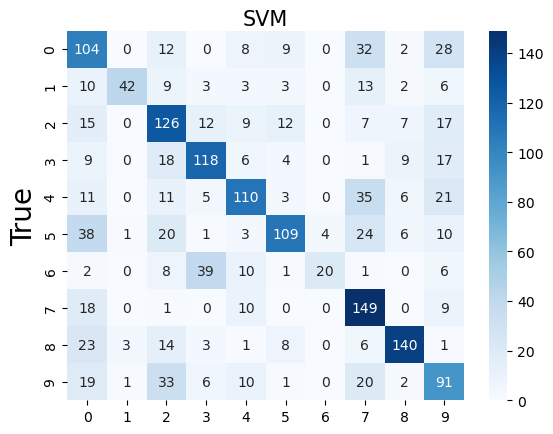

In [31]:
ax= plt.subplot()
sns.heatmap(c_mat, annot=True, ax = ax,fmt='g',cmap='Blues'); 
ax.set_xlabel('SVM', fontsize=15)
ax.xaxis.set_label_position('top') 

ax.set_ylabel('True', fontsize=20)

plt.show()

# RF

In [32]:
from sklearn.ensemble import RandomForestClassifier

rc_clf = RandomForestClassifier()
rc_clf.fit(X_train,y_train.argmax(axis=1))

rc_pred = rc_clf.predict(X_test)


accuracy_score(y_test.argmax(axis=1),rc_pred)*100

88.32283915283344

In [33]:
c_mat=confusion_matrix(y_test.argmax(axis=1),rc_pred)

In [34]:
c_mat

array([[187,   0,   3,   0,   0,   0,   0,   2,   0,   3],
       [  3,  69,   4,   5,   2,   1,   0,   3,   1,   3],
       [  1,   0, 181,   6,   4,   1,   0,   1,   1,  10],
       [  5,   0,   9, 147,   3,   2,   1,   0,   4,  11],
       [  1,   0,   2,   1, 177,   0,   0,  12,   1,   8],
       [  0,   0,   2,   1,   0, 212,   0,   0,   1,   0],
       [  0,   0,   8,   9,   2,   0,  66,   0,   0,   2],
       [  2,   0,   1,   0,   4,   0,   0, 175,   0,   5],
       [  0,   0,   6,   1,   0,   0,   0,   1, 190,   1],
       [  1,   0,  19,   9,   6,   2,   0,   6,   1, 139]], dtype=int64)

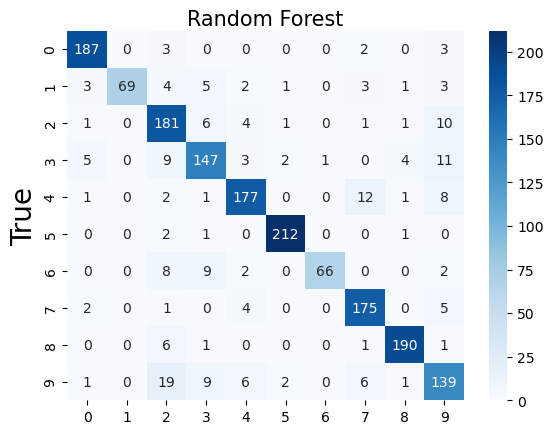

In [35]:
ax= plt.subplot()
sns.heatmap(c_mat, annot=True, ax = ax,fmt='g',cmap='Blues'); 
ax.set_xlabel('Random Forest', fontsize=15)
ax.xaxis.set_label_position('top') 

ax.set_ylabel('True', fontsize=20)

plt.show()

In [74]:
filename="UrbanSound8K/dog.wav"
sound_signal, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=sound_signal, sr=sample_rate, n_mfcc=20)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

In [75]:
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)

In [76]:
result_array = model.predict(mfccs_scaled_features)

1/1 [==============================] - 0s 23ms/step


In [77]:
 model.predict(mfccs_scaled_features)

1/1 [==============================] - 0s 35ms/step


array([[3.7310584e-03, 4.6800254e-03, 1.8550515e-01, 5.2660036e-01,
        1.6854918e-02, 9.3084481e-03, 1.7293090e-01, 1.1941316e-05,
        5.7045944e-02, 2.3331296e-02]], dtype=float32)

In [78]:
result_classes = ["air_conditioner","car_horn","children_playing","dog_bark","drilling", "engine_idling", "gun_shot", "jackhammer", "siren", "street_music"]

result = np.argmax(result_array[0])
print(result_classes[result])  

dog_bark
